In [ ]:
pip install matplotlib

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
df19 = pd.read_csv('2019.csv')
df19.columns = ['Rank','Country','Score','GDP','Support','Health','Freedom','Generosity','Corruption']
df19['Year'] = 2019
df19.head()

,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [27]:
df18 = pd.read_csv('2018.csv')
df18.columns = ['Rank','Country','Score','GDP','Support','Health','Freedom','Generosity','Corruption']
df18['Year'] = 2018
df18.head()

,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [28]:
df = df18.append(df19)
df.head()

,Rank,Country,Score,GDP,Support,Health,Freedom,Generosity,Corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


Text(0, 0.5, 'Score')

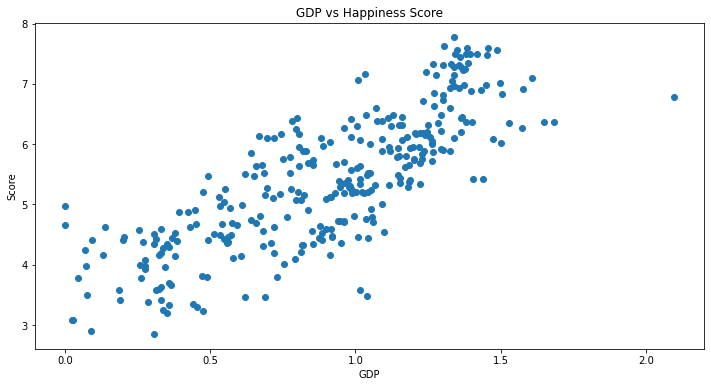

In [29]:
fig, ax = plt.subplots(figsize = (12,6))
x = df['GDP']
y = df['Score']
plt.scatter(x,y)
plt.title('GDP vs Happiness Score')
plt.xlabel('GDP')
plt.ylabel('Score')

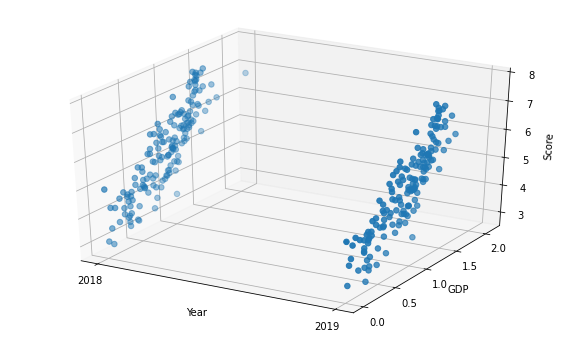

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Year'],df['GDP'],df['Score'], s=30)
ax.set( xlabel='Year', ylabel='GDP',zlabel='Score')
plt.xticks(np.arange(2018,2020))
plt.show()

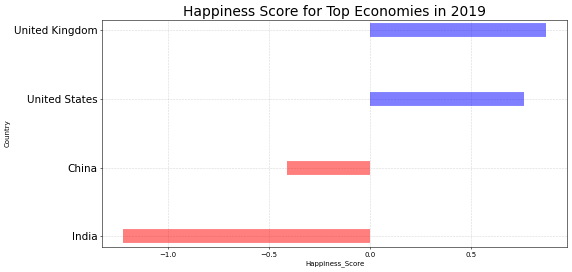

In [45]:
# Data processing
top_economies = ['United States', 'China','United Kingdom','India']
df_top = df19[(df19['Country'].isin(top_economies))].sort_values(['Country'])
df_top.reset_index(drop=True)
x = df_top.loc[:, ['Score']]
df_top['Score_z'] = (x - x.mean())/x.std()
df_top['colors'] = ['red' if x < 0 else 'blue' for x in df_top['Score_z']]
df_top.sort_values('Score_z', inplace=True)
df_top.reset_index(inplace=True)
# Draw plot
plt.figure(figsize=(12,6), dpi= 50)
plt.hlines(y=df_top.index, xmin=0, xmax=df_top.Score_z, color=df_top.colors, alpha=0.5, linewidth=20)
# Decorations
plt.gca().set(ylabel='Country', xlabel='Happiness_Score')
plt.yticks(df_top.index, df_top.Country, fontsize=15)
plt.title('Happiness Score for Top Economies in 2019', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

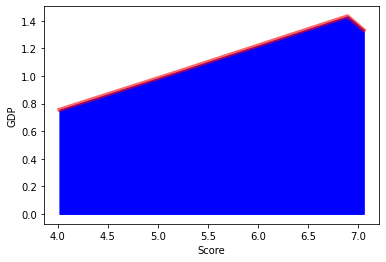

In [48]:
x = df_top['Score']
y = df_top['GDP']
# Decorations
plt.fill_between( x, y, color="blue")
plt.xlabel('Score')
plt.ylabel('GDP')
plt.plot(x, y, color="red", alpha=0.6, linewidth=4)

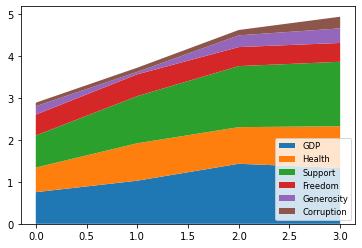

In [57]:
# Stacked Area Chart
plt.stackplot(df_top.index,[df_top['GDP'], df_top['Health'],df_top['Support'], df_top['Freedom']],df_top['Generosity'], df_top['Corruption'],
              labels=['GDP', 'Health', 'Support', 'Freedom','Generosity','Corruption'])
plt.legend(loc=4, fontsize='small')
plt.show()

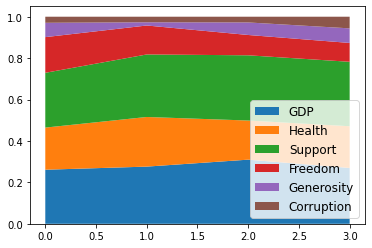

In [58]:
# 100% Stacked Area Chart
data_perc = df_top[['GDP', 'Health', 'Support', 'Freedom','Generosity','Corruption']]
data_perc = data_perc.divide(data_perc.sum(axis=1), axis=0)
plt.stackplot(data_perc.index,[data_perc['GDP'], data_perc['Health'],data_perc['Support'], data_perc['Freedom']],data_perc['Generosity'], data_perc['Corruption'],
              labels=['GDP', 'Health', 'Support', 'Freedom','Generosity','Corruption'])
plt.legend(loc=4, fontsize='large')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


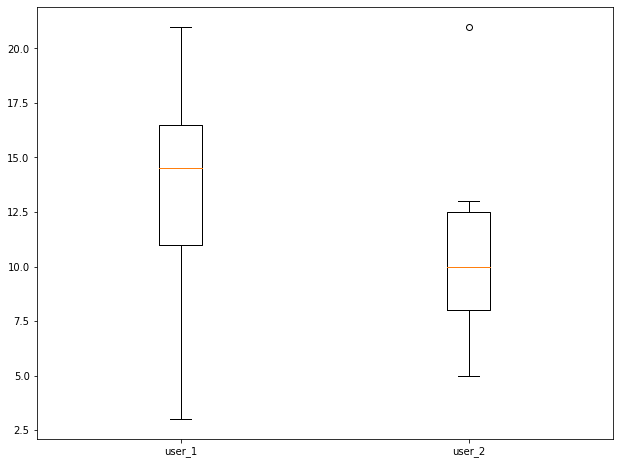

In [62]:
# Create dataset
user_1 = [10, 3, 15, 21, 17, 14]
user_2 = [5, 13, 10, 7, 9, 12,21]
data = [user_1, user_2]
fig = plt.figure(figsize =(8, 6)) 
  
# Create axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Create plot 
bp = ax.boxplot(data) 
  
# Show plot 
plt.xticks([1,2],['user_1','user_2'])
plt.show()